In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate the datasets A and B in R2 with each of them consisting 2000 data points from normal 
distribution. The dataset A and B has been drawn from the N (μ1, Σ1)   and N (μ2, Σ2).   Let us fix the μ1 
= [-1,1] and μ2 = [1,1].

In [2]:
mean1 = [-1,1]
mean2 = [1,1]

**Interpreting variance-covariance matrix:**
The diagonal elements of the matrix contain the variances of the variables and the off-diagonal elements contain the covariances between all possible pairs of variables.

In [3]:
cov1 = [[0.6, 0], [0, 0.6]]
cov2 = [[0.7, 0], [0, 0.3]]
cov3 = [[0.6, 0.25], [0.25, 0.4]]

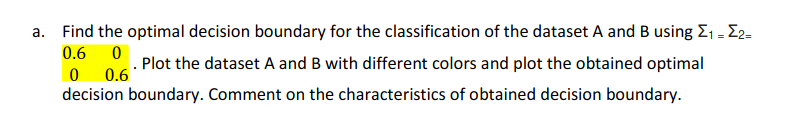

In [4]:
A1 = np.random.multivariate_normal(mean1, cov1,2000)
A1.shape
B1 = np.random.multivariate_normal(mean2, cov1,2000)
B1.shape

(2000, 2)

In [5]:
x=np.concatenate((A1, B1))

In [ ]:
x=A1

In [6]:
x.shape

(4000, 2)

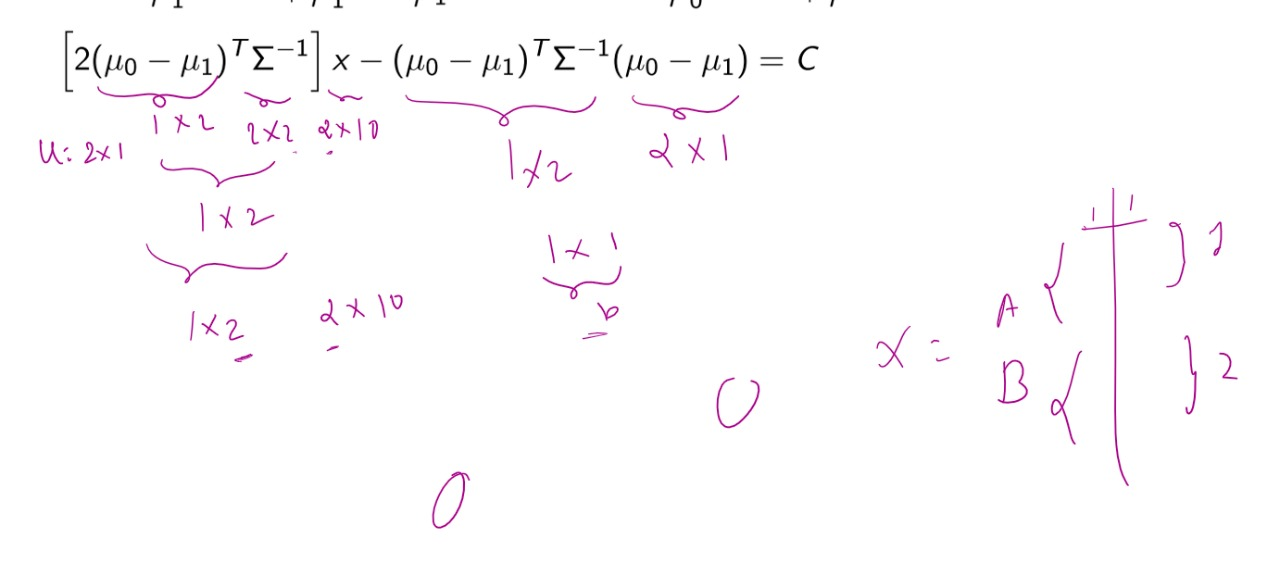

In [9]:
difference_of_mean=(np.array(mean1)-np.array(mean2)).reshape(-1,1).T

In [8]:
sigma_inv=np.linalg.inv(cov1)
sigma_inv.shape

(2, 2)

In [7]:
x=x.T
x.shape

(2, 4000)

In [10]:
mx=2*np.dot(np.dot(difference_of_mean,sigma_inv),x)

In [ ]:
mx.shape

(1, 2000)

In [11]:
b=np.dot(np.dot(difference_of_mean,sigma_inv),difference_of_mean.T)

In [ ]:
b

array([[6.66666667]])

In [45]:
def my_fn(A1, B1):
  x=np.concatenate((A1, B1))
  difference_of_mean=(np.array(mean1)-np.array(mean2)).reshape(-1,1).T
  sigma_inv=np.linalg.inv(cov1)
  x=x.T
  mx=2*np.dot(np.dot(difference_of_mean,sigma_inv),x)
  b=np.dot(np.dot(difference_of_mean,sigma_inv),difference_of_mean.T)
  y=mx-b
  from sklearn.preprocessing import MinMaxScaler
  data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
  scaler = MinMaxScaler((-4,4))
  new_y = scaler.fit_transform(y.T)

  return y, new_y

In [12]:
y=mx-b

In [13]:
y.shape

(1, 4000)

In [ ]:

y=y.T

In [ ]:
plt.plot()

In [27]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler((-4,4))
new_y = scaler.fit_transform(y.T)

In [25]:
new_y.values

AttributeError: ignored

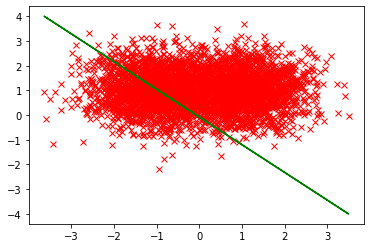

In [28]:
plt.plot(x.T[:,0].reshape(-1,1),x.T[:,1].reshape(-1,1),'x',color='r')
plt.plot(x.T[:,0].reshape(-1,1),new_y,'g')

In [41]:
new_y[:2000].shape

(2000, 1)

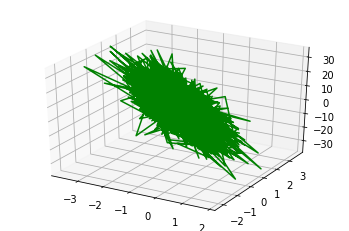

In [73]:
from mpl_toolkits import mplot3d
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = x.T[:,0].reshape(-1,1)
x = x.T[:,0].reshape(-1,1)
y = z * np.cos(25 * z)
 
# plotting
#ax.plot3D(x, y, z, 'green')
ax.plot3D(A1[:,0].reshape(-1,1),A1[:,1].reshape(-1,1), yy, 'green') 

In [71]:
A1[:,0].shape, y.T[:2000].shape

((2000,), (2000, 1))

In [72]:
from itertools import chain
yy=list(chain.from_iterable(y.T[:2000]))

In [67]:
y[:2000].reshape(2000,)

ValueError: ignored

In [69]:
y, new_y = my_fn(A1, B1)

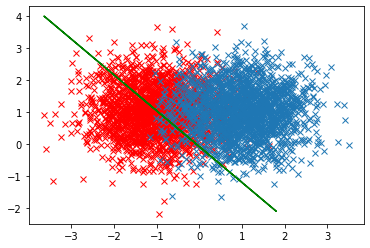

In [55]:

# Plotting training dataset

plt.plot(A1[:,0].reshape(-1,1),A1[:,1].reshape(-1,1),'x',color='r')
plt.plot(B1[:,0].reshape(-1,1),B1[:,1].reshape(-1,1),'x')
plt.plot(A1[:,0].reshape(-1,1),new_y[:2000],'g')  # solid green #A1[:,0].reshape(-1,1),
#plt.plot(x.T[:,0].reshape(-1,1),y.T,'g')

#plt.scatter( color= "red")
# x-axis label
#plt.xlabel('x_train')
# frequency label
#plt.ylabel('y_train')
# plot title
#plt.title('Traing dataset!')
 
# function to show the plot
plt.show()

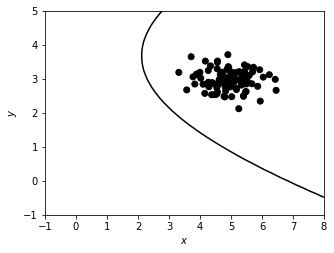

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.naive_bayes import GaussianNB

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1

#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary, zorder=2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

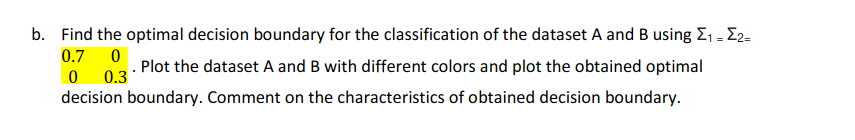

In [43]:
A2 = np.random.multivariate_normal(mean1, cov2,2000)
B2 = np.random.multivariate_normal(mean2, cov2,2000)

In [46]:
y, new_y = my_fn(A2, B2)

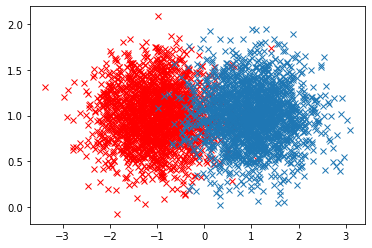

In [50]:
# Plotting training dataset

plt.plot(A2[:,0].reshape(-1,1),A2[:,1].reshape(-1,1),'x',color='r')
plt.plot(B2[:,0].reshape(-1,1),B2[:,1].reshape(-1,1),'x')
plt.plot(A2[:,0].reshape(-1,1),new_y[:2000])
#plt.scatter( color= "red")
# x-axis label
#plt.xlabel('x_train')
# frequency label
#plt.ylabel('y_train')
# plot title
#plt.title('Traing dataset!')
 
# function to show the plot
plt.show()

In [ ]:
np.cov(A2,B2)[0][1]

0.17373996859989335

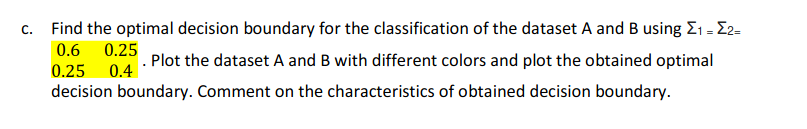

In [74]:
A3 = np.random.multivariate_normal(mean1, cov3,2000)
B3 = np.random.multivariate_normal(mean2, cov3,2000)

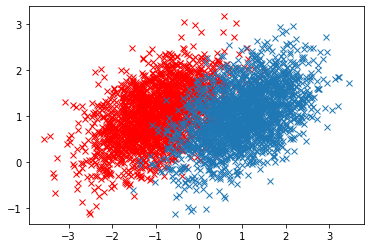

In [ ]:
# Plotting training dataset

plt.plot(A3[:,0].reshape(-1,1),A3[:,1].reshape(-1,1),'x',color='r')
plt.plot(B3[:,0].reshape(-1,1),B3[:,1].reshape(-1,1),'x')

#plt.scatter( color= "red")
# x-axis label
#plt.xlabel('x_train')
# frequency label
#plt.ylabel('y_train')
# plot title
#plt.title('Traing dataset!')
 
# function to show the plot
plt.show()

array([[2.34518866, 3.43417214],
       [3.43417214, 5.02882283]])